# BCB 546  Python Assignment

## Dependency

BioPython



## Task 1: Get sequence from fasta files



### Function: get_sequences_from_file(fasta_fn)

**Description:** Get sequence from a fasta file into dictionary format

**Arguments:**

* fasta_fn: fasta file

**Return:** dictionaries, containing sequences with their species names


In [1]:
from Bio import SeqIO

def get_sequences_from_file(fasta_fn):           # define a function
    sequence_data_dict = {}                      # return sequence data in dictionary format 
    
    for record in SeqIO.parse(fasta_fn, "fasta"):# a for-loop over every record of the fasta file, discription and sequence are seperated
        description = record.description.split() # split the discription of the record
        species_name = description[1] + " " + description[2] # define species names with 1st and 2nd elements in splitted discription
        sequence_data_dict[species_name] = record.seq        # output the sequence with the corrisponding species name
    return(sequence_data_dict)                   # return each sequence with species name

In [2]:
# read the fatsta file with the defined function

penguin_seq = get_sequences_from_file("penguins_cytb.fasta")

In [3]:
# inspection of the read file
penguin_seq

{'Aptenodytes forsteri': Seq('ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCC...TAA'),
 'Aptenodytes patagonicus': Seq('ATGGCCCCAAACCTCCGAAAATCCCATCCTCTCCTAAAAATAATTAATAACTCC...TAA'),
 'Eudyptes chrysocome': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'),
 'Eudyptes chrysolophus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'),
 'Eudyptes sclateri': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'),
 'Eudyptula minor': Seq('ATGGCCCCCAACCTCCGAAAATCTCACCCCCTCCTAAAAATAATCAACAACTCT...TAA'),
 'Pygoscelis adeliae': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATTAACAACTCC...TAA'),
 'Pygoscelis antarctica': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATCAACAACTCC...TAG'),
 'Pygoscelis papua': Seq('ATGGCCCCCAACCTTCGAAAATCCCACCCTCTCCTAAAAATAATCAACAAATCC...TAG'),
 'Spheniscus demersus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAACAATCAACAACTCC...TAA'),
 'Spheniscus humboldti': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAAC

In [4]:
len(penguin_seq)

type(penguin_seq)

dict

## Task 2: Translate DNA to AA

### Function: dna_to_aa(dna_string)

**Description:** translate DNA sequence into amino acids, return a string

**Arguments:**

* dna_string: string that contains DNA sequence
**Return:** sting, containing aa sequence



In [5]:
from Bio.Data import CodonTable


def dna_to_aa(dna_string):
    
    # using this specific codon table 
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
    
    # convert stop codons into asterisks to make sure the following tranlation loop will not choke
    mito_table.forward_table["TAA"] = "*"
    mito_table.forward_table["TAG"] = "*"
    mito_table.forward_table["AGG"] = "*"
    mito_table.forward_table["AGA"] = "*"
    
    aa_seq = ""
   
    for i in range(0,len(dna_string),3):
        codon = dna_string[i:i+3]                  # through every 3rd position to get codon 
        aa = mito_table.forward_table[codon]    # retrieve the amino acid
        if aa !='*':                            
            aa_seq += aa
        else:
            break
        
    return aa_seq

In [6]:
first_aa = dna_to_aa(penguin_seq['Aptenodytes forsteri'])

In [7]:
first_aa

'MAPNLRKSHPLLKMINNSLIDLPTPSNISAWWNFGSLLGICLTTQILTGLLLAMHYTADTTLAFSSVAHTCRNVQYGWLIRNLHANGASFFFICIYLHIGRGFYYGSYLYKETWNTGIILLLTLMATAFVGYVLPWGQMSFWGATVITNLFSAIPYIGQTLVEWTWGGFSVDNPTLTRFFALHFLLPFMIAGLTLIHLTFLHESGSNNPLGIVANSDKIPFHPYYSTKDILGFALMLLPLTTLALFSPNLLGDPENFTPANPLVTPPHIKPEWYFLFAYAILRSIPNKLGGVLALAASVLILFLIPLLHKSKQRTMAFRPLSQLLFWALVANLIILTWVGSQPVEHPFIIIGQLASLTYFTTLLILFPIAGALENKMLNH'

In [8]:
len(first_aa)

380

## Task 3:  Alternative way to translate DNA to AA


### Functio:  translate_sequences(dna_dict)

**Description:** Translate DNA sequence into amino acids in dictionaries

**Arguments:**

* dna_dict: dictionaries that contain DNA sequences and their names

**Return:** dictionaries, containing amino acids sequences with their species names




**Reference:** http://biopython.org/DIST/docs/tutorial/Tutorial.html#sec25


In [9]:
from Bio.Seq import Seq

def translate_sequences(dna_dict):                 
    aa_dict = {}
    
    for name, dna_seq in dna_dict.items():
        aa_seq = dna_seq.translate(to_stop = False)    # leave stop codon off
        aa_dict[name] = aa_seq
    return aa_dict

In [10]:
aa_3 = translate_sequences(penguin_seq)

In [11]:
aa_3['Aptenodytes forsteri']

Seq('MAPNLRKSHPLLKIINNSLIDLPTPSNISA**NFGSLLGICLTTQILTGLLLAI...NH*')

In [12]:
penguin_aa = translate_sequences(penguin_seq)

In [13]:
aa_3["Aptenodytes forsteri"]

Seq('MAPNLRKSHPLLKIINNSLIDLPTPSNISA**NFGSLLGICLTTQILTGLLLAI...NH*')

In [14]:
len(aa_3["Aptenodytes forsteri"])

381

## Task 4: Compute protein molecular weight

### Function: compute_molecular_weight(aa_string)


**Description:** count protein molecular weight

**Arguments:**

* aa_string: string that contains amino acids sequence

**Return:** a number that indicates the molecular weight of a protein sequence


**Reference:** https://biopython.org/wiki/ProtParam



In [15]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis

def compute_molecular_weight(aa_string):
    analysed_aa_seq = ProteinAnalysis(aa_string)      # retrieve protein sequence (string format) from dictionaries to compute molecular weight 
    aa_weight = analysed_aa_seq.molecular_weight()
    return aa_weight

In [16]:
penguin_seq['Aptenodytes forsteri']

Seq('ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCC...TAA')

In [17]:
first_aa_weight = compute_molecular_weight(first_aa)

In [18]:
first_aa_weight

42459.602100000004

# Task 5: Count GC-content

### Function: count_GC_content(dna_string)


**Description:** count GC countent of DNA sequences in string format 

**Arguments:**

* dna_string: DNA sequence 

**Return:** number indicate the GC content of a DNA sequence


**Reference:** https://biopython.org/docs/1.75/api/Bio.SeqUtils.html



In [19]:
from Bio.SeqUtils import GC

def count_GC_content(dna_string):
    GC_content = GC(dna_string)
    return GC_content

In [20]:
first_GC = count_GC_content(penguin_seq['Aptenodytes forsteri'])

In [21]:
first_GC

48.38145231846019

# Task 6

### Add two new columns to the penguin DataFrame: (1) molecular weight and (2) GC content.
###  Set the value to 'NaN' to indicate that these cells are currently empty.

In [22]:
import pandas as pd
import numpy as np

penguins_df = pd.read_csv("penguins_mass.csv")                           # Includes only data for body mass 


penguins_df = penguins_df.reindex(columns=penguins_df.columns.tolist() + # adding new columns filled with NaN
                                  ['molecular weight', 'GC content'])

penguins_df = penguins_df.set_index('species')                           # set the first column as row names


penguins_df

,mass,molecular weight,GC content
species,,,
Aptenodytes forsteri,28.00,NaN,NaN
Aptenodytes patagonicus,13.40,NaN,NaN
Eudyptes chrysocome,2.80,NaN,NaN
Eudyptes chrysolophus,4.50,NaN,NaN
Eudyptes sclateri,4.25,NaN,NaN
Eudyptula minor,1.60,NaN,NaN
Pygoscelis adeliae,4.60,NaN,NaN
Pygoscelis antarctica,4.10,NaN,NaN
Pygoscelis papua,6.10,NaN,NaN


# Task 7 

Write a for-loop that translates each sequence and also gets molecular weight and computes the GC contentof each translated sequence and adds those data to DataFrame.

Fill in empty cells in DF that you created above.


### Function: fill_weight_GC(dna_dict):


**Description:** 

calculate molecular weight and GC countent of DNA sequences in dictionaries
append the calculated molecular weight and GC content into corresponding cells in the penguins_df DataFrame

**Arguments:**

* dna_dict: DNA sequences in dictionaries


**Return:** DataFrame


**Reference:** 

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.at.html

https://stackoverflow.com/questions/13842088/set-value-for-particular-cell-in-pandas-dataframe-using-index/24517695#24517695


In [23]:
cytb_seqs = get_sequences_from_file("penguins_cytb.fasta") # read fasta into dictionaries

In [24]:
def fill_weight_GC (dna_dict):                         
    penguins_df
    
    for key, value in dna_dict.items():
        
        dna_seq = value                                   
        aa = dna_to_aa(dna_seq)                           # translate DNA to aa sequence
        weight = compute_molecular_weight(aa)             # calculate molecular weight
        GC = count_GC_content(dna_seq)                    # calculate GC-content
        
        penguins_df.at[key, 'molecular weight'] = weight  # put the molecular weight to the corresponding cell in the dataframe
        penguins_df.at[key, 'GC content'] = GC            # put the GC-content to the corresponding cell in the dataframe
         
    return penguins_df
        

In [25]:
fill_weight_GC(cytb_seqs)

,mass,molecular weight,GC content
species,,,
Aptenodytes forsteri,28.00,42459.6021,48.381452
Aptenodytes patagonicus,13.40,42563.7067,49.693788
Eudyptes chrysocome,2.80,42475.5753,51.181102
Eudyptes chrysolophus,4.50,42445.5493,50.918635
Eudyptes sclateri,4.25,42475.5753,50.831146
Eudyptula minor,1.60,42491.6408,49.256343
Pygoscelis adeliae,4.60,42458.6140,49.081365
Pygoscelis antarctica,4.10,42404.5423,47.769029
Pygoscelis papua,6.10,42595.8759,47.156605


In [26]:
df_for_plot = fill_weight_GC(cytb_seqs) 
df_for_plot.reset_index(inplace=True)       # covert species names to a coloum
df_for_plot

,species,mass,molecular weight,GC content
0,Aptenodytes forsteri,28.00,42459.6021,48.381452
1,Aptenodytes patagonicus,13.40,42563.7067,49.693788
2,Eudyptes chrysocome,2.80,42475.5753,51.181102
3,Eudyptes chrysolophus,4.50,42445.5493,50.918635
4,Eudyptes sclateri,4.25,42475.5753,50.831146
5,Eudyptula minor,1.60,42491.6408,49.256343
6,Pygoscelis adeliae,4.60,42458.6140,49.081365
7,Pygoscelis antarctica,4.10,42404.5423,47.769029
8,Pygoscelis papua,6.10,42595.8759,47.156605
9,Spheniscus demersus,3.20,42431.5490,48.293963


# Task 8

Plot a bar-chart of the mass with the x-axes labeled with species names.

*Q1* What is the smallest penguin species? 

## *Q2* What is the geographical range of this species?


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# prepare data for ploting, ordered by mass

bar_data = df_for_plot[['species', 'mass']].sort_values(by='mass', ascending=False)

[Text(0, 0, 'Aptenodytes forsteri'),
 Text(1, 0, 'Aptenodytes patagonicus'),
 Text(2, 0, 'Pygoscelis papua'),
 Text(3, 0, 'Spheniscus humboldti'),
 Text(4, 0, 'Pygoscelis adeliae'),
 Text(5, 0, 'Eudyptes chrysolophus'),
 Text(6, 0, 'Eudyptes sclateri'),
 Text(7, 0, 'Pygoscelis antarctica'),
 Text(8, 0, 'Spheniscus magellanicus'),
 Text(9, 0, 'Spheniscus demersus'),
 Text(10, 0, 'Eudyptes chrysocome'),
 Text(11, 0, 'Eudyptula minor')]

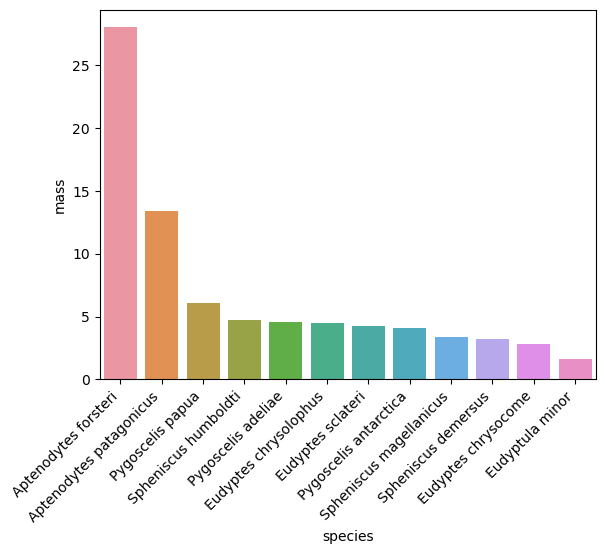

In [38]:
bar_plot =  sns.barplot(x = 'species', y = 'mass',data = bar_data, )    # draw bar plot

bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation = 45,     # rotate x-axis lables for better display
                         horizontalalignment='right')   

# plt.xticks(rotation = 90)                                             # another way to rotate x-axis lables

## Task 9 


Plot a visualization of the molecular weight (y-axis) as a function of GC-content (x-axis).

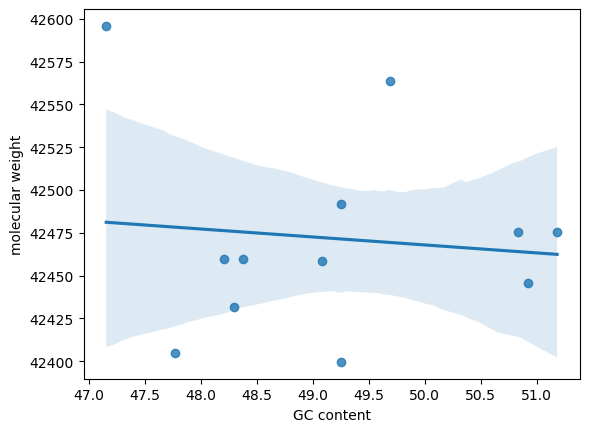

In [44]:
fig9 = sns.regplot(x='GC content', y='molecular weight', data=df_for_plot)

#fig9.set(ylim=(42200, 42800))   # set y-axis limits

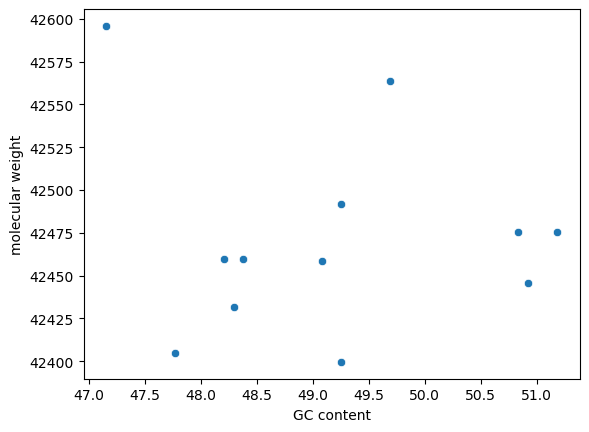

In [43]:
#fig9 = sns.barplot(x = 'GC content', y = 'molecular weight', data = df_for_plot)

#fig9 = sns.regplot(x = 'GC content', y = 'molecular weight', data = df_for_plot)


fig9 = sns.scatterplot(x='GC content', y='molecular weight', data=df_for_plot)



## Task 10


Save the new DataFrame to a file called "penguins_mass_cytb.csv"

In [45]:
df_for_plot.to_csv('penguins_mass_cytb.csv')

## Task 11 - BONUS 

What else can we do with this dataset in Python? 

Add functions or anything that might be interesting and fun. (optional)